### Pytorch Gradient Descent - Simple Review

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

### Hyper-parameters Setting

In [14]:
input_size = 1 
# One Dimensional data

output_size = 1 
# One Dimensional data

num_epoch = 500
learning_rate = 0.01

### Creating Toy DataSet

In [15]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

x_train
y_train

array([[1.7  ],
       [2.76 ],
       [2.09 ],
       [3.19 ],
       [1.694],
       [1.573],
       [3.366],
       [2.596],
       [2.53 ],
       [1.221],
       [2.827],
       [3.465],
       [1.65 ],
       [2.904],
       [1.3  ]], dtype=float32)

### Linear regression model Generation

In [16]:
model = nn.Linear(input_size, output_size)

###  Loss and Optimizer Definition

In [17]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Training the Model

In [18]:
for epoch in range(num_epoch):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    # Changing inputs and targets into pytorch NOT NUMPY in order to use nn.Linear(~~)
    
    predict = model(inputs)
    loss = loss_function(predict, targets)
    
    optimizer.zero_grad()   
    # Before the loss.backward(), clearing up the optimiser 
    loss.backward()
    optimizer.step()
    
    if(epoch +1) %50 ==0:
        print('Epock [{} /{}], Loss: {:.4f}'.format(epoch+1, num_epoch, loss.item()))

Epock [50 /500], Loss: 0.4431
Epock [100 /500], Loss: 0.3810
Epock [150 /500], Loss: 0.3329
Epock [200 /500], Loss: 0.2957
Epock [250 /500], Loss: 0.2670
Epock [300 /500], Loss: 0.2447
Epock [350 /500], Loss: 0.2275
Epock [400 /500], Loss: 0.2142
Epock [450 /500], Loss: 0.2040
Epock [500 /500], Loss: 0.1960


### Visualization -  Plot the Graph

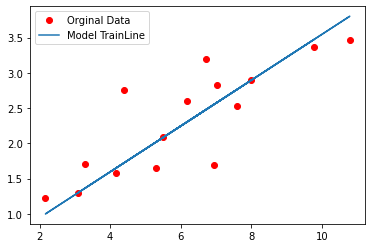

In [19]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
# Chaning to numpy for the plot cuz tensor can't draw any graphs
# detach() :: seperating model from the calculated results

plt.plot(x_train, y_train, 'ro', label='Orginal Data')
plt.plot(x_train, predicted, label='Model TrainLine')
plt.legend()
plt.show()

# save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')